In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
# imputer
from sklearn.impute import SimpleImputer, KNNImputer




url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
names = ["feature" + str(x) for x in range(1, 591)]
df1 = pd.read_csv(url1,sep=" ", names=names, na_values = "NaN",header=None)
df1.head()

url2 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
df2 = pd.read_csv(url2,sep=" ",names = ["Result","Date"])

#df2.columns =['Pass/Fail','Date']
df2.head()




#Convertion of Date into Datetime from Object(String) data types
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes



#Joinig TWO df1 and df2 Dataframe naming SECOM
Secom = pd.concat([df1,df2],axis = 1)
print(Secom)

Secom = Secom.drop(['Date'],axis=1)
                   
# establish target and features of the manufacturing data
# set the target to the encoded manufacturing outcome column
y = Secom[['Result']]
# set the features as the rest of the dataset after dropping the features that are no
x = Secom.drop(['Result'], axis=1)

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

#Splitting data


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1,stratify = y)



# getting the counts
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)




#Removing features having Missing ratio more than 50%


def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isnull().sum()/len(dataframe))>threshold]
    return columns.tolist()

 

na_columns = percentna(x_train, 0.5)
len(na_columns)
x_train_dn = x_train.drop(na_columns, axis=1)
x_train_dn.shape





#Low Variance Filter
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train_dn)

 

constant_columns = [column for column in x_train_dn.columns
                    if column not in x_train_dn.columns[var_thres.get_support()]]


print(len(constant_columns))

x_train_lv = x_train_dn.drop(constant_columns,axis=1)

      feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3      2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843     100.0   82.2467   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763     100.0   98.4689   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236     100.0   99.4122   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726     100.0   98.7978   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978     100.0   85.1011   

      feature8  feature9  feature10  ..

## Outlier Method 1 - By Imputation

In [36]:
def outliers(feat):
 upper_limit = feat.mean() + 3*feat.std()
 lower_limit = feat.mean() - 3*feat.std()

 feat = np.where(
    feat >upper_limit,
    upper_limit,
    np.where(
       feat <lower_limit,
        lower_limit,
        feat ))
 return feat

x_train_outliers_imputation =x_train_lv.copy()
for column in x_train_outliers_imputation:
  x_train_outliers_imputation[column] = outliers(x_train_outliers_imputation[column])

In [37]:
x_train_outliers_imputation.describe()

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature577,feature578,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1091.000000,1092.000000,1087.000000,1087.000000,1087.000000,1087.000000,1091.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,3015.082750,2495.196782,2200.322094,1381.893133,1.821274,101.032762,0.122306,1.463782,-0.001043,0.000315,...,4.346528,15.877673,0.500169,0.014741,0.003718,2.947665,0.021299,0.016082,0.005168,95.888701
std,73.067035,76.711822,28.486598,398.234410,9.358089,5.976035,0.002578,0.073782,0.014958,0.008959,...,11.656483,9.094645,0.003323,0.005784,0.001137,1.163493,0.011380,0.007710,0.002538,79.701997
min,2791.466508,2257.353789,2110.828251,109.059907,0.681500,82.716610,0.096410,1.241881,-0.046607,-0.027022,...,0.663600,4.582000,0.489897,0.006000,0.001800,1.197500,-0.006000,0.004200,0.001200,0.000000
25%,2967.795000,2453.317500,2180.766650,1081.685250,1.016000,97.971100,0.121100,1.409300,-0.011000,-0.005300,...,1.413200,11.477900,0.498000,0.011500,0.003100,2.302550,0.013400,0.010600,0.003400,44.368600
50%,3013.150000,2499.770000,2200.733300,1283.436800,1.316800,101.611100,0.122300,1.463500,-0.001350,0.000500,...,1.622250,13.903350,0.500300,0.013700,0.003500,2.740400,0.020800,0.014800,0.004500,71.084200
75%,3057.185000,2539.462500,2218.055500,1592.172750,1.518150,104.521100,0.123800,1.519050,0.008300,0.006025,...,1.895850,16.981800,0.502400,0.016300,0.004100,3.256700,0.027650,0.019400,0.006300,114.506600
max,3239.339743,2733.592859,2289.367849,2668.915215,179.449153,119.417516,0.127600,1.656400,0.044632,0.027689,...,55.716553,54.586343,0.509800,0.076331,0.017090,15.788597,0.059452,0.041893,0.013523,377.722000


## Outlier Method 2 - By QuantileTransformer

In [38]:
def IQR_outliers(data,limit=1.5):
    numColumns = data.select_dtypes(include=np.number).columns.tolist(); # extract list of numeric columns
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    outliers=((data[numColumns] < (Q1 - limit*IQR)) | (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers 
from sklearn.preprocessing import QuantileTransformer
x_train_lv = x_train_lv.copy()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state= 42)
df_outliers = pd.DataFrame(quantile_transformer.fit_transform(x_train_lv),columns=x_train_lv.columns)
outliers = IQR_outliers(df_outliers)

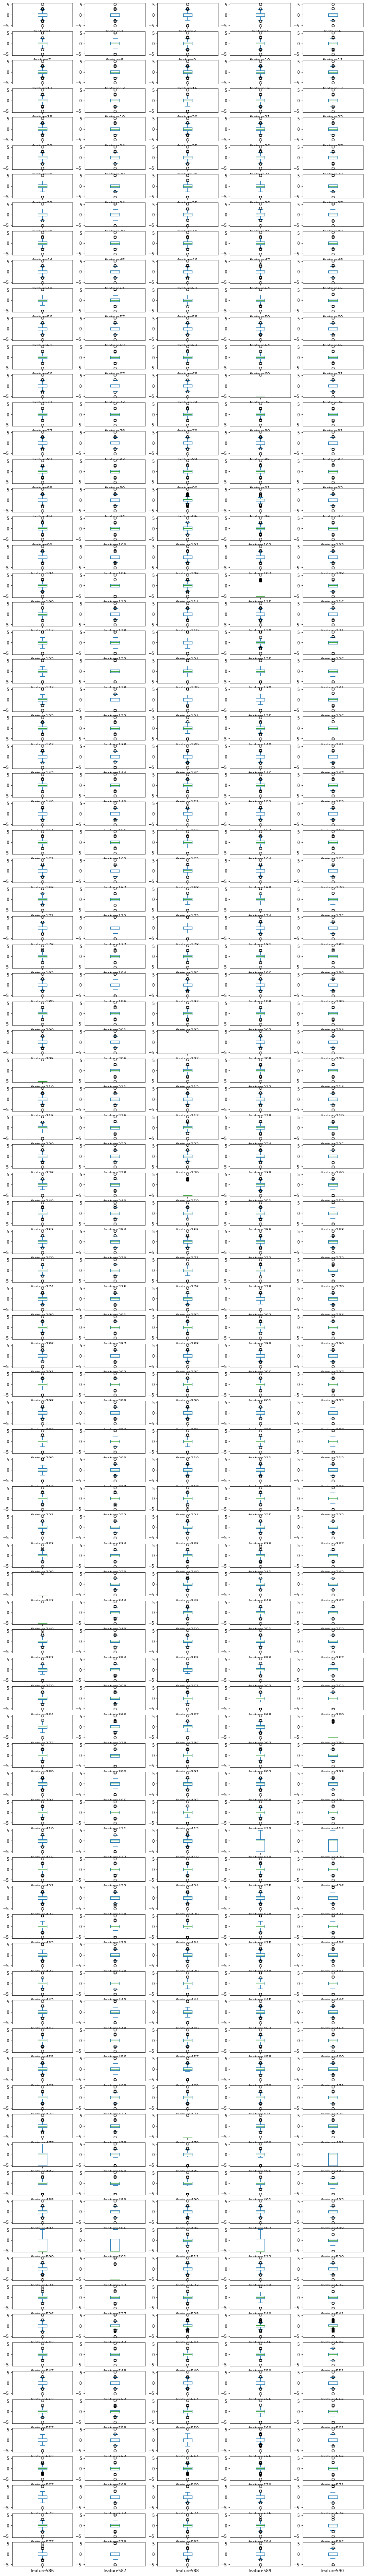

In [39]:
df_outliers.plot(kind='box', subplots=True,layout=(120,5), fontsize=10, figsize=(15,150));

## Missing Value Imputation Method 1- Mean 

#### 1. Using Outlier Imputation dataframe

In [40]:
numColumns = x_train_outliers_imputation.select_dtypes(include=np.number).columns.tolist();

# initialize imputer. use strategy='mean' for mean imputation
imputer = SimpleImputer(strategy='mean')# fit the imputer on X_train. we pass only numeric columns with NA's here.
imputer.fit(x_train_outliers_imputation[numColumns])# transform the data using the fitted imputer
X_train_mean_impute = imputer.transform(x_train_outliers_imputation[numColumns])
X_test_mean_impute = imputer.transform(x_test[numColumns])# put the output into DataFrame. remember to pass columns used in fit/transform
X_train_mean_impute = pd.DataFrame(X_train_mean_impute, columns=numColumns)
X_test_mean_impute = pd.DataFrame(X_test_mean_impute, columns=numColumns)



#### Accuracy Check for Missing Value Imputation step

In [41]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV


classifiers = [['RandomForest :',RandomForestClassifier()]]


for name,classifier in classifiers:
    clf=classifier.fit(X_train_mean_impute,y_train)
    y_pred=classifier.predict(X_test_mean_impute)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(X_train_mean_impute,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(X_test_mean_impute,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )

 





 RandomForest : 

Training Score for RandomForest :  100.00
Testing Score for RandomForest : 93.42
Classification report  
               precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

Confusion matrix  
 [[440   0]
 [ 31   0]]
ROC AUC  : 0.5


#### 2. Using Outlier Transformer dataframe

In [42]:
numColumns = df_outliers.select_dtypes(include=np.number).columns.tolist();

# initialize imputer. use strategy='mean' for mean imputation
imputer = SimpleImputer(strategy='mean')# fit the imputer on X_train. we pass only numeric columns with NA's here.
imputer.fit(df_outliers[numColumns])# transform the data using the fitted imputer
X_train_mean_impute = imputer.transform(df_outliers[numColumns])
X_test_mean_impute = imputer.transform(x_test[numColumns])# put the output into DataFrame. remember to pass columns used in fit/transform
X_train_mean_impute = pd.DataFrame(X_train_mean_impute, columns=numColumns)
X_test_mean_impute = pd.DataFrame(X_test_mean_impute, columns=numColumns)

## Missing Value Imputation Method 2- KNN Imputer

#### 1.By Using Outlier Imputation

In [45]:
# initialize imputer
imputer = KNNImputer()



# fit the imputer on X_train. pass only numeric columns.
imputer.fit(x_train_outliers_imputation[numColumns])



# transform the data using the fitted imputer
X_train_knn_impute1 = imputer.transform(x_train_outliers_imputation[numColumns])
X_test_knn_impute1 = imputer.transform(x_test[numColumns])



# put the output into DataFrame. remember to pass columns used in fit/transform
X_train_knn_impute1 = pd.DataFrame(X_train_knn_impute1, columns=numColumns)
X_test_knn_impute1 = imputer.transform(x_test[numColumns])

#### 2.By Using Outlier Transformer

In [ ]:
# initialize imputer
imputer = KNNImputer()



# fit the imputer on X_train. pass only numeric columns.
imputer.fit(df_outliers[numColumns])



# transform the data using the fitted imputer
X_train_knn_impute2 = imputer.transform(df_outliers[numColumns])
X_test_knn_impute2 = imputer.transform(x_test[numColumns])



# put the output into DataFrame. remember to pass columns used in fit/transform
X_train_knn_impute2 = pd.DataFrame(df_outliers, columns=numColumns)
X_test_knn_impute2 = imputer.transform(x_test[numColumns])

## Missing Value Imputation Method 3- Hotdeck 

#### 1.By Using Outlier Imputation

In [50]:
#Hot deck (LOCF - last observation carried forward )

x_train_Hot_deck1 = x_train_outliers_imputation.copy()

x_train_Hot_deck1[num_cols_with_na] = x_train_Hot_deck1[num_cols_with_na].fillna(method ='ffill')


num_cols_with_na = num_cols[x_train_Hot_deck1[num_cols].isnull().mean() > 0]
print(f"*** numerical columns that have NaN's ({len(num_cols_with_na)}): \n{num_cols_with_na}\n\n")


x_train_Hot_deck1.isnull().mean().sort_values(ascending =False)

NameError: name 'num_cols_with_na' is not defined

#### 2.By Using Outlier Transformer

In [52]:
#Hot deck (LOCF - last observation carried forward )

x_train_Hot_deck2 = df_outliers.copy()

x_train_Hot_deck2[num_cols_with_na] = x_train_Hot_deck2[num_cols_with_na].fillna(method ='ffill')


num_cols_with_na = num_cols[x_train_Hot_deck2[num_cols].isnull().mean() > 0]
print(f"*** numerical columns that have NaN's ({len(num_cols_with_na)}): \n{num_cols_with_na}\n\n")


x_train_Hot_deck2.isnull().mean().sort_values(ascending =False)

NameError: name 'num_cols_with_na' is not defined

## Missing Value Imputation Method 4- Latest Fill

#### 1.By Using Outlier Imputation

In [ ]:
# latest information available
x_train_LastFill1 = x_train_outliers_imputation.copy()
x_train_LastFill1.fillna(method='ffill', inplace=True)
x_train_LastFill1.fillna(method='bfill', inplace=True)
x_train_LastFill1

x_train_LastFill1.isna().sum().sort_values(ascending=False).head(10)

#### 2.By Using Outlier Transformer

In [ ]:
# latest information available
x_train_LastFill2 = df_outliers.copy()
x_train_LastFill2.fillna(method='ffill', inplace=True)
x_train_LastFill2.fillna(method='bfill', inplace=True)
x_train_LastFill2

x_train_LastFill2.isna().sum().sort_values(ascending=False).head(10)

## Missing Value Imputation Method 5- MICE

#### 1.By Using Outlier Imputation

In [ ]:



from impyute.imputation.cs import mice

# start the MICE training
imputed_training1=mice(x_train_outliers_imputation.values)

array_sum = np.sum(imputed_training1) #https://www.adamsmith.haus/python/answers/how-to-check-for-nan-elements-in-a-numpy-array-in-python
Trainset1 = np.isnan(array_sum)

Trainset1 #Checking for NaN elements in a NumPy array returns True if the array contains any NaN elements and False otherwise.

#### 2.By Using Outlier Transformer

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training2=mice(df_outliers.values)

array_sum = np.sum(imputed_training2) #https://www.adamsmith.haus/python/answers/how-to-check-for-nan-elements-in-a-numpy-array-in-python
Trainset2 = np.isnan(array_sum)

Trainset2 #Checking for NaN elements in a NumPy array returns True if the array contains any NaN elements and False otherwise.